In [2]:
import neurokit as nk
import pandas as pd
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import warnings
import re
import os
import json

## Explore BikeExtend data

In [8]:
acq_df, samp_rate = nk.bio.bio_data.read_acqknowledge("../data/sub-2002/ses-day1pre/sub-2002_ses-day1pre_0002.acq")
acq_df.shape[0]

Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.


96559

In [9]:
# see what the dataframe looks like
acq_df.head()

,PPG100C,GSR100C,RSP100C,Scanner TTL,Scanner Trigger
2019-07-10 07:45:49.774886,-0.037842,0.585939,1.594849,0.000000,5.0
2019-07-10 07:45:49.779886,-0.038147,0.585939,1.585693,0.000000,5.0
2019-07-10 07:45:49.784886,-0.039368,0.588991,1.572571,-0.001221,5.0
2019-07-10 07:45:49.789886,-0.039368,0.585939,1.555481,-0.000305,5.0
2019-07-10 07:45:49.794886,-0.039368,0.585939,1.538696,-0.001221,0.0


In [10]:
# use a bash command to look inside the correct txt file
!head -n 5 ../data/sub-2002/ses-day1pre/sub-2002_ses-day1pre_task-rest_run-2_physio.txt

-0.0378418	0.585939	1.59485	0	5	
-0.038147	0.585939	1.58569	0	5	
-0.0393677	0.588991	1.57257	-0.0012207	5	
-0.0393677	0.585939	1.55548	-0.000305176	5	
-0.0393677	0.585939	1.5387	-0.0012207	0	


In [11]:
# since there is no header in the txt file, we need to supply our own header
# in the pandas dataframe
acq_df.columns

Index(['PPG100C', 'GSR100C', 'RSP100C', 'Scanner TTL', 'Scanner Trigger'], dtype='object')

In [12]:
txt_df = pd.read_csv("../data/sub-2002/ses-day1pre/sub-2002_ses-day1pre_task-rest_run-2_physio.txt",
            header=None,
            index_col=False,
            names=acq_df.columns,
            sep="\t")
txt_df.head()

,PPG100C,GSR100C,RSP100C,Scanner TTL,Scanner Trigger
0,-0.037842,0.585939,1.59485,0.000000,5
1,-0.038147,0.585939,1.58569,0.000000,5
2,-0.039368,0.588991,1.57257,-0.001221,5
3,-0.039368,0.585939,1.55548,-0.000305,5
4,-0.039368,0.585939,1.53870,-0.001221,0


In [13]:
# let's take a look at heart rate data
s = acq_df['PPG100C']

In [14]:
# what's at index 1?
acq_df['PPG100C'][1]

-0.03814697265625

In [15]:
# is this the same?
s[1]

-0.03814697265625

In [17]:
# whats the value in the txt_df, is it the same acq_df?
txt_df['PPG100C'][1]

-0.038147

In [18]:
# the columns are not identical
acq_df['PPG100C'].reset_index(drop=True).equals(txt_df['PPG100C'])

False

In [19]:
a = acq_df['PPG100C'].reset_index(drop=True)

In [20]:
t = txt_df['PPG100C']

In [21]:
# when we compare a column by asking if they are "close enough"
np.all(np.isclose(a, t))

True

## Explore Atrain data

In [23]:
acq_df, samp_rate = nk.bio.bio_data.read_acqknowledge("../data/sub-GEA161/ses-activepre/acute161_0002.acq")

Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.


In [24]:
acq_df.head()

,PPG100C,GSR100C,RSP100C,Scanner TTL,Scanner Trigger
2019-07-15 15:07:38.930648,0.007019,1.969911,-3.726501,-0.000610,5.0
2019-07-15 15:07:38.935648,0.007935,1.974489,-3.734131,-0.000305,5.0
2019-07-15 15:07:38.940648,0.008240,1.974489,-3.744812,-0.000305,5.0
2019-07-15 15:07:38.945648,0.007324,1.968385,-3.760681,-0.000916,5.0
2019-07-15 15:07:38.950648,0.007629,1.969911,-3.782043,-0.000610,5.0


In [26]:
# use a bash command to look inside the correct txt file
# cannot read because of line endings CRLF instead of LF
# !head -n 5 ../data/sub-GEA161/ses-activepre/NBack1_1.txt


In [28]:
# this way of reading the file does not work
txt_df = pd.read_csv("../data/sub-GEA161/ses-activepre/Rest1_1.txt",
            header=None,
            index_col=False,
            names=acq_df.columns,
            sep="\t")
txt_df.head()

,PPG100C,GSR100C,RSP100C,Scanner TTL,Scanner Trigger
0,acute161_0002.acq,NaN,NaN,NaN,NaN
1,5 msec/sample,NaN,NaN,NaN,NaN
2,5 channels,NaN,NaN,NaN,NaN
3,PPG100C,NaN,NaN,NaN,NaN
4,Volts,NaN,NaN,NaN,NaN


In [29]:
np.any(txt_df.iloc[0,:].isnull())

True

In [30]:
# correct way to read atrain txt file
txt_df = pd.read_csv("../data/sub-GEA161/ses-activepre/Rest1_1.txt",
                     header=14,
                     index_col=0,
                     delim_whitespace=True,
                     names=acq_df.columns)
# txt_df.drop([0,1,2,3,4], axis=0, inplace=True)

txt_df.head()

,PPG100C,GSR100C,RSP100C,Scanner TTL,Scanner Trigger
0.000000,0.007019,1.96991,-3.72650,-0.000610,5
0.000083,0.007935,1.97449,-3.73413,-0.000305,5
0.000167,0.008240,1.97449,-3.74481,-0.000305,5
0.000250,0.007324,1.96839,-3.76068,-0.000916,5
0.000333,0.007629,1.96991,-3.78204,-0.000610,5


In [45]:
acq_df.columns

Index(['PPG100C', 'GSR100C', 'RSP100C', 'Scanner TTL', 'Scanner Trigger'], dtype='object')

In [34]:
atrain_file = "../data/sub-GEA161/ses-activepre/Rest1_1.txt"
atrain_ptrn = re.compile(r".*/"
                         r"(?P<sub_id>sub-[A-Za-z0-9]+)"
                         r"/(?P<ses_id>ses-[A-Za-z0-9]+)"
                         r"/(?P<task_id>[A-Za-z]+)[1-9]"
                         r"(_(?P<run_id>[0-9]))?.txt")

extend_file = "../data/sub-2002/ses-day1pre/sub-2002_ses-day1pre_task-rest_physio.txt"
extend_ptrn = re.compile(r".*/"
                         r"(?P<sub_id>sub-[A-Za-z0-9]+)"
                         r"(_(?P<ses_id>ses-[A-Za-z0-9]+))"
                         r"(_(?P<task_id>task-[A-Za-z0-9]+))"
                         r"(_(?P<run_id>run-[0-9]+))?"
                         r"(_physio)?.txt")
atrain_mch = atrain_ptrn.match(atrain_file)
extend_mch = extend_ptrn.match(extend_file)

In [35]:
display(atrain_mch.groupdict())
display(extend_mch.groupdict())

{'sub_id': 'sub-GEA161',
 'ses_id': 'ses-activepre',
 'task_id': 'Rest',
 'run_id': '1'}

{'sub_id': 'sub-2002',
 'ses_id': 'ses-day1pre',
 'task_id': 'task-rest',
 'run_id': None}

In [123]:
res = nk.bio_eda.eda_process(acq_df['GSR100C'], filter_type='butter', band="highpass", order=2, frequency=0.0005, sampling_rate=200)

In [124]:
res['df'].head()

,EDA_Raw,EDA_Filtered,EDA_Phasic,EDA_Tonic,SCR_Onsets,SCR_Recoveries,SCR_Peaks
0,8.593752,0.138790,0.000000,2.271725,NaN,NaN,NaN
1,8.590700,0.138788,0.000000,2.271783,NaN,NaN,NaN
2,8.592226,0.138785,0.039807,2.271840,NaN,NaN,NaN
3,8.587648,0.138782,0.039668,2.271897,NaN,NaN,NaN
4,8.592226,0.138779,0.039529,2.271954,NaN,NaN,NaN


In [127]:
out = res['df']
out["EDA_Filtered"].mean()

-0.01060736976041536

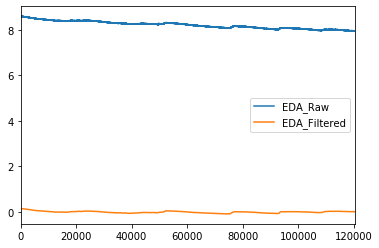

In [126]:
out.plot(y=["EDA_Raw", "EDA_Filtered"])
plt.savefig('test.png')

In [ ]:
plt.plot(res['df'][["EDA_Raw", "EDA_Filtered"]])

In [ ]:
start = acq_df["Scanner Trigger"].where(acq_df["Scanner Trigger"]==0.0).first_valid_index()
end = acq_df["Scanner Trigger"].where(acq_df["Scanner Trigger"]==0.0).last_valid_index()

In [ ]:
acq_cut_df = acq_df.iloc[(acq_df.index >= start) & (acq_df.index <= end)]
display(acq_cut_df.head())
display(acq_cut_df.tail())

In [71]:
# functions to analyze gsr data
def match_acq_txt(acq, txts):
    # minimum length of the data file (data for 1 second)
    min_len = 200
    # connects the acqknowledge file to the txt file
    acq_txt_dict = {}
    # read the acqknowledge file
    acq_df, samp_rate = nk.bio.bio_data.read_acqknowledge(acq)
    # there should be enough rows in the dataframes
    if acq_df.shape[0] < min_len:
        return None, acq, txts
            
    # big loop to see which txt file goes with the acknowledge file
    for txt in txts:
        # only look at txt files in the same directory as acknowledge file
        if os.path.dirname(acq) != os.path.dirname(txt):
            continue
        # attempt 1 to read the txt file
        # assumes no header information and no time column
        txt_df = pd.read_csv(txt,
        header=None,
        index_col=False,
        names=acq_df.columns,
        sep="\t")

        # the file may have a header
        if np.any(txt_df.iloc[0,:].isnull()):
            # assume the txt file has a header
            try:
                txt_df = pd.read_csv(txt,
                    header=14,
                    index_col=0,
                    delim_whitespace=True,
                    names=acq_df.columns)
            except:
                # assume the acknowledge file does not have the "Scanner TTl column"
                columns = list(acq_df.columns)
                columns.insert(-1, "Scanner TTL")
                txt_df = pd.read_csv(txt,
                    header=14,
                    index_col=0,
                    delim_whitespace=True,
                    names=columns)
            # assume in the two above cases,
            # there is a time column being treated as the index
            txt_df.reset_index(drop=True, inplace=True)
        # select this column for comparisons
        # assume the txt and acq have at least min_len rows
        a = acq_df['PPG100C'].reset_index(drop=True)[:min_len]
        t = txt_df['PPG100C'][:min_len]

        # the columns cannot be identical due to rounding error,
        # but can be close
        if np.all(np.isclose(a, t)):
            acq_txt_dict[acq] = {'txt': txt, 'df': acq_df}
            txts.remove(txt)
            return acq_txt_dict, None, txts
    
    # nothing matches
    return None, acq, txts

def filter_gsr(acq_txt_dict):
    key = list(acq_txt_dict.keys())[0]
    
    acq_df = acq_txt_dict[key]['df']
    # where the Scanner Trigger is 0 initiates a slice acquition in the scanner
    # this may be false in some scenerios (e.g. when scan trigger is always 0)
    start = acq_df["Scanner Trigger"].where(acq_df["Scanner Trigger"]==0.0).first_valid_index()
    end = acq_df["Scanner Trigger"].where(acq_df["Scanner Trigger"]==0.0).last_valid_index()
    if start is None or end is None:
        warnings.warn("Scan Trigger Not Recognized, keeping all rows")
        acq_cut_df = acq_df
    else:
        acq_cut_df = acq_df.iloc[(acq_df.index >= start) & (acq_df.index <= end)]

    # process the GSR data
    res = nk.bio_eda.eda_process(acq_df['GSR100C'], filter_type='butter',
                                 band="lowpass", order=1, frequency=1,
                                 sampling_rate=200)

    acq_txt_dict[key]['df'] = res['df']
    return acq_txt_dict

def gen_filenames(acq_txt_dict):
    # pattern for matching atrain files
    atrain_ptrn = re.compile(r".*/"
                             r"(?P<sub_id>sub-[A-Za-z0-9]+)"
                             r"/(?P<ses_id>ses-[A-Za-z0-9]+)"
                             r"/(?P<task_id>[A-Za-z]+)[1-9]"
                             r"(_(?P<run_id>[0-9]))?.txt")
    # pattern for matching extend files
    extend_ptrn = re.compile(r".*/"
                             r"(?P<sub_id>sub-[A-Za-z0-9]+)"
                             r"(_(?P<ses_id>ses-[A-Za-z0-9]+))"
                             r"(_(?P<task_id>task-[A-Za-z0-9]+))"
                             r"(_(?P<run_id>run-[0-9]+))?"
                             r"(_physio)?.txt")
    for acq, tgt_dct in acq_txt_dict.items():
        atrain_mch = atrain_ptrn.match(tgt_dct['txt'])
        extend_mch = extend_ptrn.match(tgt_dct['txt'])
        
        if atrain_mch:
            fdict = atrain_mch.groupdict()
            # make task lowercase
            fdict['task_id'] = fdict['task_id'].lower()
            # make the runs 1 or 2 (since there are only 2 runs per session)
            if fdict['run_id'] == "3" or fdict['run_id'] == "4":
                fdict['run_id'] = int(fdict['run_id']) - 2
        elif extend_mch:
            fdict = extend_mch.groupdict()
            # make run an integer if necessary
            if fdict["run_id"]:
                fdict["run_id"] = int(fdict["run_id"].lstrip("run-"))
        else:
            raise("FileName did not match either atrain or extend pattern")

        # strip the keys from the labels
        fdict["sub_id"] = fdict["sub_id"].lstrip("sub-")
        fdict["ses_id"] = fdict["ses_id"].lstrip("ses-")
        fdict["task_id"] = fdict["task_id"].lstrip("task-")
        
        # template output file changes depending if run is a key or not
        if not fdict["run_id"]:
            tmplt = os.path.join(outdir,
                                 "sub-{sub_id}",
                                 "ses-{ses_id}",
                                 "sub-{sub_id}_ses-{ses_id}_task-{task_id}_{typ}.{ext}")
        elif fdict["run_id"]:
            tmplt = os.path.join(outdir,
                                 "sub-{sub_id}",
                                 "ses-{ses_id}",
                                 "sub-{sub_id}_ses-{ses_id}_task-{task_id}_run-{run_id}_{typ}.{ext}")
        fig_file = tmplt.format(**fdict, typ="qa", ext="svg")
        data_file = tmplt.format(**fdict, typ="physio", ext="tsv")
        sum_file = tmplt.format(**fdict, typ="summary", ext="json")
        
        return {'fig': fig_file, 'data': data_file, 'smry': sum_file, 'fdict': fdict}

def write_results(acq_txt_dict, filenames):
    key = list(acq_txt_dict.keys())[0]
    
    fdict = filenames['fdict']
    out_df = acq_txt_dict[key]['df']
    out_df.to_csv(filenames['data'])
    title = os.path.basename(filenames['fig'].split('.')[1])
    out_df.plot(y=["EDA_Raw", "EDA_Filtered"], title=title)
    plt.savefig(filenames['fig'])
    plt.clf()

    sub_dict = {
        "participant_id": fdict["sub_id"],
        "session_id": fdict["ses_id"],
        "task_id": fdict["task_id"],
        "run_id": fdict.get("run_id"),
        "EDA_mean": out_df["EDA_Filtered"].mean(),
        "EDA_median": out_df["EDA_Filtered"].median(),
        "EDA_std": out_df["EDA_Filtered"].std()
    }

    with open(filenames['smry'], 'w') as outfile:  
        json.dump(sub_dict, outfile)
    
    return sub_dict

        
def analyze_gsr(acqs, txts, outdir):
    group_tsv = os.path.join(outdir, "group.tsv")
    acq_nonmatches = []
    group_msr = []
    for acq in acqs:
        acq_txt_dict, acq_nonmatch, txts = match_acq_txt(acq, txts)
        if acq_txt_dict is None:
            acq_nonmatches.append(acq_nonmatch)
            continue
        
        fname_dict = gen_filenames(acq_txt_dict)
        
        if (
            os.path.isfile(fname_dict['fig']) and
            os.path.isfile(fname_dict['data']) and
            os.path.isfile(fname_dict['smry'])
           ):
            with open(fname_dict['smry']) as json_file:  
                sub_dict = json.load(json_file)
        else:
            acq_txt_dict_proc = filter_gsr(acq_txt_dict)
            sub_dict = write_results(acq_txt_dict_proc, fname_dict)
        
        group_msr.append(sub_dict)
  
    group_df = pd.DataFrame(group_msr)
    group_df.to_csv(group_tsv, sep="\t")
    txt_nonmatch = txts
    
    return acq_txt_dict_proc, no_acq_matches, no_txt_matches, group_df
            

In [72]:
acqs = glob("../data/sub-*/ses-*/*.acq")

txts = glob("../data/sub-*/ses-*/*.txt")

outdir = '../output/qaTrain'

In [73]:
txts[0:5]

['../data/sub-2002/ses-day1post/sub-2002_ses-day1post_task-rest_run-1_physio.txt',
 '../data/sub-2002/ses-day1post/sub-2002_ses-day1post_task-rest_run-2_physio.txt',
 '../data/sub-2002/ses-day1post/sub-2002_ses-day1post_task-rest_run-3_physio.txt',
 '../data/sub-2002/ses-day1pre/sub-2002_ses-day1pre_task-breathhold.txt',
 '../data/sub-2002/ses-day1pre/sub-2002_ses-day1pre_task-rest_run-1_physio.txt']

In [74]:
acq_txt_dict, no_acq_matches, no_txt_matches, group_df = analyze_gsr(acqs, txts, outdir)

Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_da

/home/james/.conda/envs/physio/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: Scan Trigger Not Recognized, keeping all rows


Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.
Neuropsydia error: get_creation_date(): We're probably on Linux. No easy way to get creation dates here, so we'll settle for when its content was last modified.


<Figure size 432x288 with 0 Axes>

In [75]:
group_df

,EDA_mean,EDA_median,EDA_std,participant_id,run_id,session_id,task_id
0,0.587949,0.589858,0.004312,2002,1,day1post,rest
1,0.578807,0.577970,0.002610,2002,2,day1post,rest
2,0.588329,0.588725,0.001319,2002,3,day1post,rest
3,0.588603,0.588674,0.001238,2002,1,day1pre,rest
4,0.575458,0.572946,0.005273,2002,2,day1pre,rest
5,0.577828,0.578081,0.002549,2002,3,day1pre,rest
6,0.584390,0.584903,0.001760,2002,None,day1pre,breathhold
7,0.582727,0.582840,0.000710,2002,1,day2post,run
8,0.577871,0.577898,0.002201,2002,2,day2post,rest
9,0.578623,0.578652,0.001022,2002,3,day2post,rest


In [45]:
mydict = {"this": {"one": 1, "two": 2}}

In [49]:
list(mydict.keys())[0]

'this'